# <font color='#2B17B0'>CIENCIA DE DATOS APLICADA A FINANZAS</font>
Sesión 7, 2023-10-23/24<br>
Carlos Crespo Elizondo<br>
EGADE BUSINESS SCHOOL

# <font color='#2B17B0'>Librerías a utilizar en clases</font>

In [2]:
from matplotlib.patches import FancyArrow
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import herramientas_financieras as hf
import pandas as pd
import numpy as np
import itertools
import seaborn as sns


# sns.set_style('darkgrid')

In [3]:
%load_ext autoreload
%autoreload 2

# <font color='#2B17B0'>Previo a empezar la clase:</font>

1. _Leer los componentes del IPC directamente del archivo de Excel de la página de BMV/S&P IPC (desarrollarlo en otra libreta)_
    * _Link: https://www.spglobal.com/spdji/en/indices/equity/sp-bmv-ipc/#overview_
1. _Mejorar la función precios para que pueda leer los precios de una o varias emisoras_
    1. Incluir:
        1. docstring
        1. parámetros preestablecidos (accion=IPC, fecha2= la fecha de hoy y fecha1= hoy hace un año
    * **_NOTA: Actualmente la función puede leer solo una emisora_**

# <font color='#2B17B0'>Portafolios de Inversión</font>

## <font color='#2B17B0'>Retornos y volatilidad de 2 activos</font>

In [4]:
df_2activos = pd.DataFrame({
    "rojo":{'ret':.04, 'sigma':.2},
    "azul":{'ret':.12, 'sigma':.3}})
df_2activos

,rojo,azul
ret,0.04,0.12
sigma,0.20,0.30


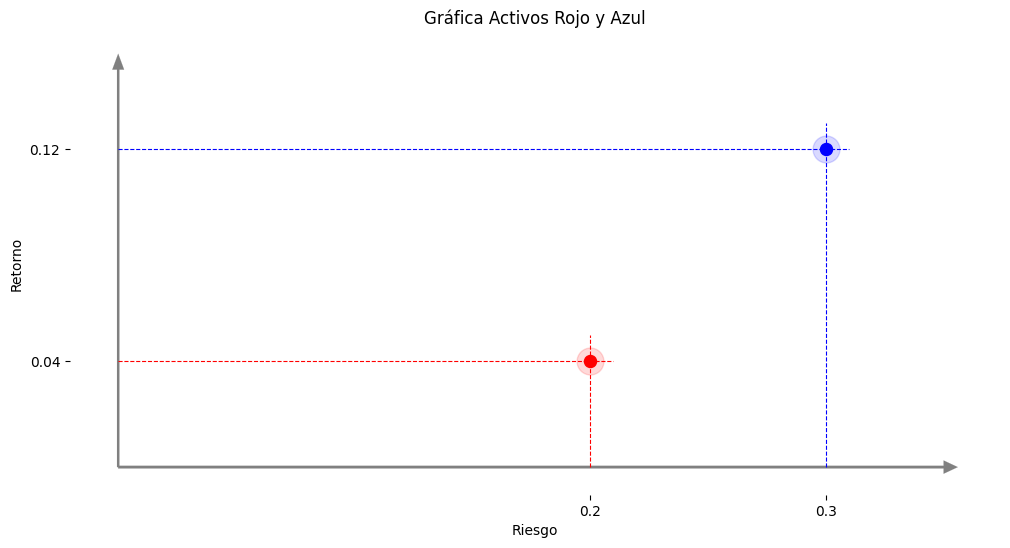

In [5]:
hf.fig_2activos(df_2activos)

### Portafolio compuesto por 50% <font color='blue'>activo azul</font> y 50% <font color='red'>activo rojo</font>

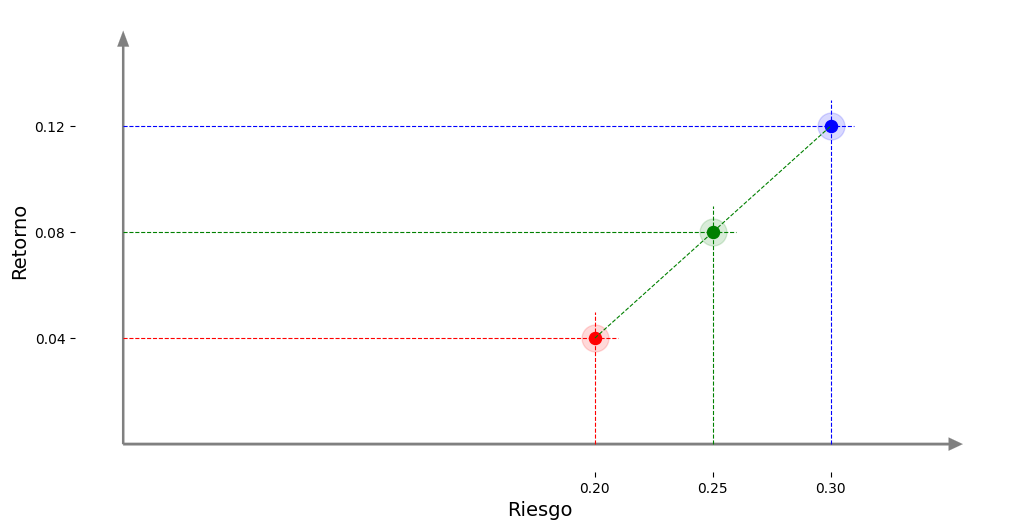

In [6]:
hf.fig_pregunta(df_2activos)

### Cálculo del retorno de un portafolio de 2 activos

$$\Large R_{w_A, w_B}=w_A*R_A + w_B*R_B$$

### Cálculo de la volatilidad de un portafolio de 2 activos (fórmula teórica)

$$\Large \sigma^2_{w_A, w_B}=\sigma^2_{A}w^2_{A}+\sigma^2_{B}w^2_{B}+2w_Aw_B\sigma_A\sigma_B\rho_{A,B}$$

$$\Large \sigma_{w_a, w_b}=\sqrt{\sigma^2_{w_A, w_B}}$$

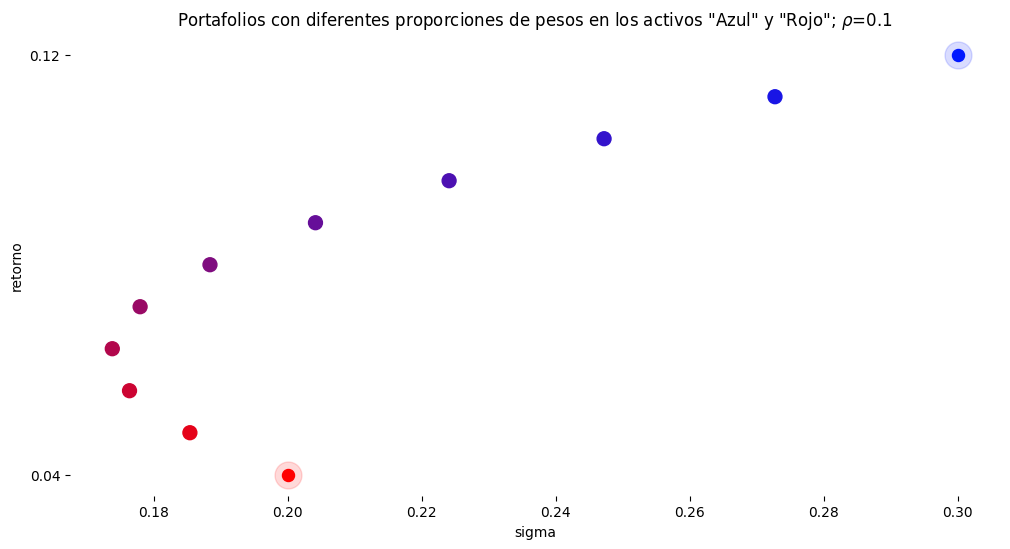

In [8]:
hf.fig_portafolio(df_2activos, .1)

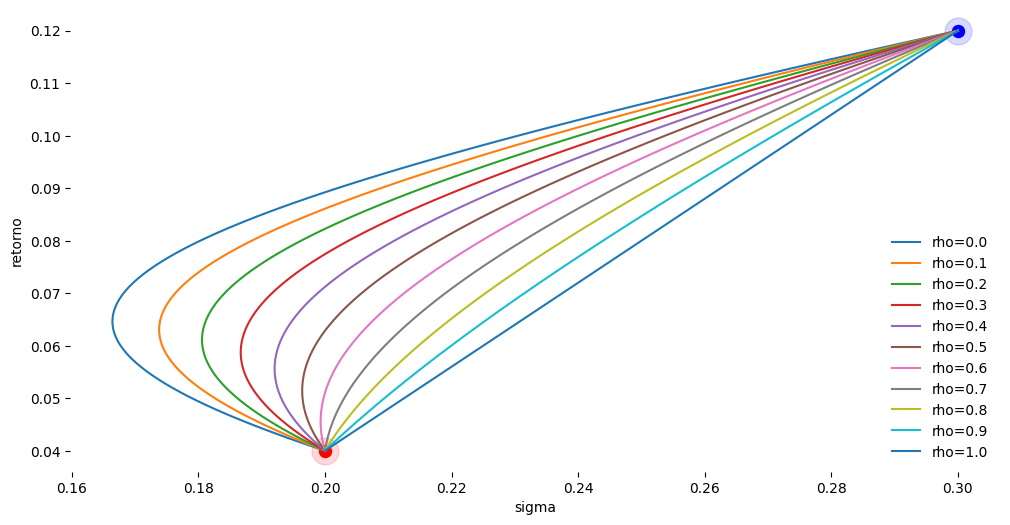

In [9]:
hf.fig_port_dif_correlacion(df_2activos)

## <font color='#2B17B0'>Construir portafolios utilizando Simulación MonteCarlo</font>

Para el desarrollo del primer portafolio de inversión, vamos a seguir los siguiente pasos:

1. Importar librerías
1. Importar precios de cierre
1. Calcular retornos diarios y anuales
1. Calcular $\sigma$ diaria y anual
1. Graficar dispersiones de los retornos anuales Vs $\sigma$ anual
1. Seleccionar de manera cuantitativa las acciones que formaran el portafolio (Sharp Ratio)
1. Calcular matriz de covarianza  de las acciones seleccionadas
1. Crear array NumPy para guardar los resultados de las simulaciones.
1. Realizar simulación Monte Carlo
1. Visualizar portafolio
1. Visualizar resultados óptimos

### <font color='royalblue'>2. Importar precios de cierre</font>

In [24]:
precios = hf.precios(hf.ipc())
precios

,^MXX,alfaa,alsea,amxb,ac,bbajioo,cuervo,bolsaa,cemexcpo,kofubl,...,gmexicob,tlevisacpo,pe&oles,kimbera,megacpo,orbia,pinfra,q,ra,walmex
fecha,,,,,,,,,,,,,,,,,,,,,
2022-10-25,48641.269531,12.918179,37.270000,16.598974,148.296494,50.792423,38.364601,33.465698,7.25,120.098686,...,61.815430,20.400642,209.399994,28.300665,39.309620,34.815292,130.360352,78.821297,129.277344,73.962303
2022-10-26,49327.109375,13.107859,37.830002,17.575384,149.508652,50.689697,39.669788,33.899948,7.43,121.800545,...,68.718918,20.410437,215.410004,27.761873,40.169666,36.027122,133.092026,75.646645,128.092026,75.196960
2022-10-27,48892.558594,12.938145,38.290001,17.897600,151.192215,51.941063,39.610466,34.220917,7.05,121.497337,...,70.346649,19.764040,207.100006,29.000145,39.805084,33.871651,133.138321,74.680855,132.638992,74.383652
2022-10-28,49086.300781,12.968094,37.110001,17.878071,151.615494,51.726276,41.291386,33.097530,7.45,120.783340,...,67.579506,20.263529,208.190002,29.104122,38.842205,32.659821,135.925522,73.189156,134.805588,73.825104
2022-10-31,49922.300781,13.137808,38.060001,17.878071,155.713730,52.090481,41.489140,33.909389,7.72,121.888573,...,68.335922,20.567139,222.009995,29.510578,38.580456,33.106812,138.009003,74.346184,134.174072,75.000984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-18,49274.781250,10.990000,61.509998,14.920000,156.690002,57.139999,39.610001,28.950001,11.14,132.440002,...,76.250000,9.440000,208.520004,35.150002,37.459999,36.959999,158.110001,137.279999,127.389999,60.310001
2023-10-19,48804.609375,10.840000,61.650002,15.090000,154.270004,56.419998,39.849998,30.580000,11.07,129.539993,...,76.010002,8.740000,206.059998,34.220001,35.500000,35.830002,151.300003,136.539993,127.300003,60.250000
2023-10-20,48275.910156,11.050000,59.730000,15.340000,153.169998,55.070000,40.700001,29.629999,10.94,126.730003,...,74.599998,8.660000,207.809998,33.450001,35.750000,36.369999,148.750000,132.149994,123.599998,59.580002


In [13]:
#del precios['kofubl']

In [25]:
precios

,^MXX,alfaa,alsea,amxb,ac,bbajioo,cuervo,bolsaa,cemexcpo,kofubl,...,gmexicob,tlevisacpo,pe&oles,kimbera,megacpo,orbia,pinfra,q,ra,walmex
fecha,,,,,,,,,,,,,,,,,,,,,
2022-10-25,48641.269531,12.918179,37.270000,16.598974,148.296494,50.792423,38.364601,33.465698,7.25,120.098686,...,61.815430,20.400642,209.399994,28.300665,39.309620,34.815292,130.360352,78.821297,129.277344,73.962303
2022-10-26,49327.109375,13.107859,37.830002,17.575384,149.508652,50.689697,39.669788,33.899948,7.43,121.800545,...,68.718918,20.410437,215.410004,27.761873,40.169666,36.027122,133.092026,75.646645,128.092026,75.196960
2022-10-27,48892.558594,12.938145,38.290001,17.897600,151.192215,51.941063,39.610466,34.220917,7.05,121.497337,...,70.346649,19.764040,207.100006,29.000145,39.805084,33.871651,133.138321,74.680855,132.638992,74.383652
2022-10-28,49086.300781,12.968094,37.110001,17.878071,151.615494,51.726276,41.291386,33.097530,7.45,120.783340,...,67.579506,20.263529,208.190002,29.104122,38.842205,32.659821,135.925522,73.189156,134.805588,73.825104
2022-10-31,49922.300781,13.137808,38.060001,17.878071,155.713730,52.090481,41.489140,33.909389,7.72,121.888573,...,68.335922,20.567139,222.009995,29.510578,38.580456,33.106812,138.009003,74.346184,134.174072,75.000984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-18,49274.781250,10.990000,61.509998,14.920000,156.690002,57.139999,39.610001,28.950001,11.14,132.440002,...,76.250000,9.440000,208.520004,35.150002,37.459999,36.959999,158.110001,137.279999,127.389999,60.310001
2023-10-19,48804.609375,10.840000,61.650002,15.090000,154.270004,56.419998,39.849998,30.580000,11.07,129.539993,...,76.010002,8.740000,206.059998,34.220001,35.500000,35.830002,151.300003,136.539993,127.300003,60.250000
2023-10-20,48275.910156,11.050000,59.730000,15.340000,153.169998,55.070000,40.700001,29.629999,10.94,126.730003,...,74.599998,8.660000,207.809998,33.450001,35.750000,36.369999,148.750000,132.149994,123.599998,59.580002


### <font color='royalblue'>3. Calcular retornos diarios y anuales</font>

#### Retornos diarios

In [26]:
retornos = np.log(precios/precios.shift(1))
retornos.dropna(inplace=True)
retornos

,^MXX,alfaa,alsea,amxb,ac,bbajioo,cuervo,bolsaa,cemexcpo,kofubl,...,gmexicob,tlevisacpo,pe&oles,kimbera,megacpo,orbia,pinfra,q,ra,walmex
fecha,,,,,,,,,,,,,,,,,,,,,
2022-10-26,0.014001,0.014576,0.014914,0.057158,0.008141,-0.002025,0.033455,0.012893,0.024524,0.014071,...,0.105872,0.000480,0.028297,-0.019222,0.021643,0.034215,0.020738,-0.041110,-0.009211,0.016555
2022-10-27,-0.008849,-0.013032,0.012086,0.018167,0.011198,0.024387,-0.001497,0.009424,-0.052498,-0.002492,...,0.023411,-0.032182,-0.039341,0.043637,-0.009117,-0.061694,0.000348,-0.012849,0.034882,-0.010875
2022-10-28,0.003955,0.002312,-0.031302,-0.001092,0.002796,-0.004144,0.041561,-0.033378,0.055186,-0.005894,...,-0.040130,0.024959,0.005249,0.003579,-0.024487,-0.036433,0.020719,-0.020176,0.016203,-0.007537
2022-10-31,0.016888,0.013002,0.025277,0.000000,0.026672,0.007016,0.004778,0.024233,0.035600,0.009109,...,0.011131,0.014872,0.064271,0.013869,-0.006762,0.013593,0.015212,0.015685,-0.004696,0.015802
2022-11-01,0.018704,0.013585,0.001050,0.000000,0.013805,0.011054,0.013258,0.014922,0.007742,0.020413,...,0.026547,0.013715,0.063606,0.009246,0.011564,0.024890,0.015446,0.083016,0.004119,0.028084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-18,-0.007908,0.006390,-0.010994,-0.031015,0.009490,0.040720,-0.018014,-0.114746,-0.035277,-0.018849,...,-0.011086,-0.001059,-0.005404,0.002564,-0.014576,0.010608,-0.002464,0.006138,-0.026187,0.003987
2023-10-19,-0.009588,-0.013743,0.002274,0.011330,-0.015565,-0.012681,0.006041,0.054776,-0.006303,-0.022140,...,-0.003152,-0.077046,-0.011868,-0.026814,-0.053741,-0.031051,-0.044026,-0.005405,-0.000707,-0.000995
2023-10-20,-0.010892,0.019187,-0.031639,0.016432,-0.007156,-0.024219,0.021106,-0.031559,-0.011813,-0.021931,...,-0.018724,-0.009195,0.008457,-0.022758,0.007018,0.014959,-0.016998,-0.032680,-0.029496,-0.011183


In [27]:
retornos_promedios = retornos.mean()
retornos_promedios

^MXX          0.000001
alfaa        -0.000701
alsea         0.001816
amxb         -0.000308
ac            0.000126
bbajioo       0.000592
cuervo        0.000170
bolsaa       -0.000543
cemexcpo      0.001647
kofubl        0.000397
volara       -0.001183
vesta         0.001289
femsaubd      0.001138
labb          0.000152
gentera       0.000420
grumab        0.001191
omab          0.000116
gapb         -0.000917
asurb        -0.000537
bimboa        0.000033
gcarsoa1      0.001882
gcc           0.001257
chdrauib      0.001538
elektra       0.000485
gfnorteo      0.000421
gfinburo     -0.000209
gmexicob      0.000675
tlevisacpo   -0.003300
pe&oles      -0.000409
kimbera       0.000637
megacpo      -0.000393
orbia         0.000130
pinfra        0.000557
q             0.002372
ra            0.000237
walmex       -0.000944
dtype: float64

#### Retornos anualizados

In [28]:
retornos_anuales = retornos_promedios * 252
retornos_anuales

^MXX          0.000312
alfaa        -0.176729
alsea         0.457524
amxb         -0.077539
ac            0.031706
bbajioo       0.149261
cuervo        0.042933
bolsaa       -0.136714
cemexcpo      0.415117
kofubl        0.099967
volara       -0.298238
vesta         0.324800
femsaubd      0.286888
labb          0.038365
gentera       0.105799
grumab        0.300042
omab          0.029352
gapb         -0.231095
asurb        -0.135300
bimboa        0.008425
gcarsoa1      0.474177
gcc           0.316813
chdrauib      0.387663
elektra       0.122239
gfnorteo      0.106034
gfinburo     -0.052689
gmexicob      0.169980
tlevisacpo   -0.831506
pe&oles      -0.103090
kimbera       0.160527
megacpo      -0.099091
orbia         0.032808
pinfra        0.140327
q             0.597719
ra            0.059786
walmex       -0.237879
dtype: float64

### <font color='royalblue'>4. Calcular $\sigma$ diaria y anual</font>

#### Sigma diaria

In [29]:
sigma = retornos.std()
sigma

^MXX          0.008968
alfaa         0.018840
alsea         0.016260
amxb          0.017595
ac            0.012760
bbajioo       0.019183
cuervo        0.014178
bolsaa        0.014357
cemexcpo      0.021406
kofubl        0.012945
volara        0.028994
vesta         0.015176
femsaubd      0.012657
labb          0.019462
gentera       0.021348
grumab        0.015042
omab          0.027385
gapb          0.025632
asurb         0.020709
bimboa        0.015129
gcarsoa1      0.020181
gcc           0.017467
chdrauib      0.017215
elektra       0.014294
gfnorteo      0.017872
gfinburo      0.018507
gmexicob      0.024946
tlevisacpo    0.026192
pe&oles       0.026627
kimbera       0.015276
megacpo       0.020103
orbia         0.019048
pinfra        0.016441
q             0.017395
ra            0.018665
walmex        0.013576
dtype: float64

#### Sigma anual

In [30]:
sigma_anual = sigma * np.sqrt(252)
# sigma_anual = sigma * (252)**.5

In [31]:
sigma_anual

^MXX          0.142356
alfaa         0.299071
alsea         0.258116
amxb          0.279314
ac            0.202553
bbajioo       0.304528
cuervo        0.225075
bolsaa        0.227917
cemexcpo      0.339805
kofubl        0.205497
volara        0.460266
vesta         0.240907
femsaubd      0.200930
labb          0.308948
gentera       0.338887
grumab        0.238790
omab          0.434721
gapb          0.406888
asurb         0.328747
bimboa        0.240163
gcarsoa1      0.320359
gcc           0.277280
chdrauib      0.273281
elektra       0.226916
gfnorteo      0.283707
gfinburo      0.293788
gmexicob      0.396000
tlevisacpo    0.415787
pe&oles       0.422687
kimbera       0.242495
megacpo       0.319131
orbia         0.302384
pinfra        0.260993
q             0.276144
ra            0.296295
walmex        0.215509
dtype: float64

### <font color='royalblue'>5. Graficar dispersiones de los retornos anuales Vs $\sigma$ anual</font>

### <font color='royalblue'>6. Seleccionar de manera cuantitativa las acciones que formaran el portafolio</font>

#### Sharpe Ratio
El Sharp Ratio, mide el rendimiento adicional que genera un activo por encima de la tasa de retorno libre de riesgo, ajustado por su volatilidad.<br><br>
$$SharpRatio = \frac{r_x - r_f}{\sigma_x}$$<br>
Como tasa libre de riesgo utilizaremos CETES a 28 dias $\approx11\%$ anual.

In [32]:
rf = .11

sharp = ((retornos_anuales - rf) / sigma_anual).sort_values(ascending=False)
sharp

q             1.766176
alsea         1.346388
gcarsoa1      1.136778
chdrauib      1.016035
cemexcpo      0.897918
vesta         0.891631
femsaubd      0.880346
grumab        0.795852
gcc           0.745863
kimbera       0.208364
gmexicob      0.151465
bbajioo       0.128925
pinfra        0.116199
elektra       0.053938
gentera      -0.012397
gfnorteo     -0.013978
kofubl       -0.048825
ra           -0.169473
omab         -0.185517
labb         -0.231867
orbia        -0.255276
cuervo       -0.297977
ac           -0.386537
bimboa       -0.422942
pe&oles      -0.504133
gfinburo     -0.553761
megacpo      -0.655189
amxb         -0.671427
asurb        -0.746167
^MXX         -0.770523
gapb         -0.838302
volara       -0.886962
alfaa        -0.958733
bolsaa       -1.082472
walmex       -1.614220
tlevisacpo   -2.264396
dtype: float64

In [33]:
sharp_corte  = .2

acciones_portafolio = sharp[sharp > sharp_corte]
acciones_portafolio

q           1.766176
alsea       1.346388
gcarsoa1    1.136778
chdrauib    1.016035
cemexcpo    0.897918
vesta       0.891631
femsaubd    0.880346
grumab      0.795852
gcc         0.745863
kimbera     0.208364
dtype: float64

In [35]:
nombre_acciones = list(acciones_portafolio.index)
numero_acciones = len(nombre_acciones)

In [36]:
nombre_acciones

['q',
 'alsea',
 'gcarsoa1',
 'chdrauib',
 'cemexcpo',
 'vesta',
 'femsaubd',
 'grumab',
 'gcc',
 'kimbera']

In [37]:
numero_acciones

10

### <font color='royalblue'>7. Calcular matriz de covarianza  de las acciones seleccionadas</font>

In [38]:
matriz_cov = retornos[nombre_acciones].cov()
matriz_cov

,q,alsea,gcarsoa1,chdrauib,cemexcpo,vesta,femsaubd,grumab,gcc,kimbera
q,0.000303,0.000056,0.000051,0.000002,0.000054,0.000049,0.000035,0.000033,0.000074,0.000044
alsea,0.000056,0.000264,0.000068,0.000044,0.000073,0.000054,0.000059,0.000047,0.000056,0.000050
gcarsoa1,0.000051,0.000068,0.000407,0.000058,0.000083,0.000068,0.000023,0.000068,0.000085,0.000066
chdrauib,0.000002,0.000044,0.000058,0.000296,0.000035,0.000052,0.000021,0.000010,0.000048,0.000031
cemexcpo,0.000054,0.000073,0.000083,0.000035,0.000458,0.000071,0.000097,0.000080,0.000162,0.000092
vesta,0.000049,0.000054,0.000068,0.000052,0.000071,0.000230,0.000026,0.000051,0.000072,0.000028
femsaubd,0.000035,0.000059,0.000023,0.000021,0.000097,0.000026,0.000160,0.000050,0.000059,0.000039
grumab,0.000033,0.000047,0.000068,0.000010,0.000080,0.000051,0.000050,0.000226,0.000058,0.000062
gcc,0.000074,0.000056,0.000085,0.000048,0.000162,0.000072,0.000059,0.000058,0.000305,0.000070
kimbera,0.000044,0.000050,0.000066,0.000031,0.000092,0.000028,0.000039,0.000062,0.000070,0.000233


### <font color='royalblue'>8. Crear array NumPy para guardar los resultados de las simulaciones</font>
Incluir las siguientes columnas:
1. \# de simulación
  1. Retorno generado
  1. $\sigma$ del portafolio
  1. Sharp Ratio del portafolio
  1. y el peso (w) de cada acción que forman el portafolio

### <font color='royalblue'>9. Realizar simulación Monte Carlo</font>

### <font color='gray'>Cálculo $E(R_p)$, $\sigma^2$ de un portafolio</font>
Para calcular el retorno de un portafolio de *"n"* activos:<br>
$E(R_p) = \displaystyle\sum_{i=1}^{n}{w_iE(R_i)}\implies Rw$<br><br>
Para calcular la $\sigma^2$ de un portafolio de dos activos -Recordar que la nombre como fórmula teórica-:<br>
$\sigma_p^2 = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\sigma_1\sigma_2\rho_{12}$<br><br>
Recordememos que la fórmula de la correlación es:<br><br>
$\large\rho=\frac{Cov_{i,j}}{\sigma_i \sigma_j}$<br><br>
Podemos simplificar la fórmula de la varianza eliminando sustituyendo la fórmula de la $\rho$ y simplificándola a:<br><br>
$\sigma_p^2 = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\sigma_1\sigma_2\frac{Cov_{1,2}}{\sigma_1 \sigma_2}\implies \sigma_p^2 = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\sigma_{1,2}$<br><br>
Para calcular la $\sigma^2$ de un portafolio de *"n"* activos:<br>
$$
\begin{array}{rcl}
\sigma_p^2 & = & \displaystyle\sum_{i=1}^{n} {w_i^2\sigma_i^2} +  \displaystyle\sum_{i=1}^{n} \displaystyle\sum_{j\neq i}^{n}w_iw_j\sigma_i\sigma_j\rho_{ij}\\
& = & \displaystyle\sum_{i=1}^{n} \displaystyle\sum_{j=i}^{n}w_iw_j\sigma_{i,j}\\
& = & w^T\sum w 
\end{array}
$$
Donde $\sum$ es la matriz de varianza - covarianza

In [39]:
numero_simulaciones = 1000
simulacion = np.zeros((numero_simulaciones, 4 + numero_acciones))

In [42]:
simulacion.shape

(1000, 14)

In [44]:
w = np.random.random(numero_acciones)
w = w/w.sum()
w

array([0.18045362, 0.19430671, 0.03993804, 0.127606  , 0.02073064,
       0.18137335, 0.17235765, 0.03234042, 0.0146054 , 0.03628818])

In [46]:
w.sum()

1.0

In [48]:
for i in range(numero_simulaciones):
    
    #calcular pesos:
    w = np.random.random(numero_acciones)
    w = w/w.sum() 
    
    #Cálculo E(Rp) y varianza, sigma:
    retorno_portafolio = np.sum(retornos_anuales[nombre_acciones] * w)
    varianza_porafolio = np.dot(w.T, np.dot(matriz_cov, w))
    sigma_porafolio = np.sqrt(varianza_porafolio) * np.sqrt(252)
    
    simulacion[i, 0] = i + 1  #<---- número de simulación
    simulacion[i, 1] = retorno_portafolio
    simulacion[i, 2] = sigma_porafolio
    simulacion[i, 3] = (simulacion[i,1] - rf) / simulacion[i, 2]  #<---- sharp ratio
    for j in range(len(w)):
        simulacion[i, 4 + j] = w[j]
    

In [50]:
simulacion[0]

array([1.        , 0.34974068, 0.15131964, 1.5843329 , 0.06950022,
       0.13349608, 0.07738354, 0.0188435 , 0.10732632, 0.02872473,
       0.06558303, 0.19802658, 0.14506528, 0.15605073])

In [51]:
nombre_acciones

['q',
 'alsea',
 'gcarsoa1',
 'chdrauib',
 'cemexcpo',
 'vesta',
 'femsaubd',
 'grumab',
 'gcc',
 'kimbera']

### <font color='gray'>Renombrar columnas</font>

### <font color='gray'>Identificar portafolio con el máximo Sharp Ratio y el de mínima varianza </font>

### <font color='royalblue'>10. Visualizar portafolio</font>